<a href="https://colab.research.google.com/github/esn73/lab_python/blob/master/ml03_train_test_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 머신 러닝의 과정
    * 문제 정의 --> 데이터 준비 --> 데이터 탐색 --> 훈련 셋, 검증 셋, 테스트 셋 분리 --> 모델 선택, 훈련 --> 모델 평가 --> 모델 튜닝
* 훈련 셋, 검증 셋, 테스트 셋으로 나누는 방법
    * 순차 추출(sequential sampling)
    * 임의 추출(random sampling)
    * 층화 추출(stratified sampling)
* 분류 모델 평가 지표
    * 정확도(accuracy)
    * 정밀도(precision)
    * 재현율(recall)
    * F1-score
    * 민감도(sensitivity)
    * 특이도(spei
* 특성 스케일링
    * 표준화(standardization)
    * 정규화(normalization)

# 필요한 모듈, 클래스, 함수들을 import

In [ ]:
import numpy as np # ndarray(배열) 함수, 메서드
import pandas as pd # Series, DataFrame 함수, 메서드
import matplotlib.pyplot as plt # 시각화
import seaborn as sns # 시각화

# Machine Learning
# 머신 러닝 모델(알고리즘) - KNN 분류기
from sklearn.neighbors import KNeighborsClassifier
# 훈련/테스트 셋 분리 함수
from sklearn.model_selection import train_test_split
# 모델 평가 지표 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# 특성 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 데이터 준비

* fish.csv 파일: 어종, 특성들(무게, 길이, ...)
* 2진 분류(도미, 빙어)
* 특성 

In [ ]:
fish_scv = 'https://github.com/JakeOh/202110_itw_lab_python/raw/main/fish.csv'

In [ ]:
fish = pd.read_csv(fish_scv)

In [ ]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [ ]:
df = fish.loc[fish['Species'].isin(['Bream', 'Smelt']),
              ['Species', 'Weight', 'Length']]
df

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [ ]:
df.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [ ]:
# DataFrame을 특성과 타겟으로 분리하고 ndarray(배열)로 변환
features = df.iloc[:, 1:].values #DataFrame이기때문에 values를 사용해서 배열로 변환
target = df['Species'].values

In [ ]:
features.shape # (n_samples, n_features)

(49, 2)

In [ ]:
target.shape # (n_samples,)

(49,)

In [ ]:
features[:5, :]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [ ]:
target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [ ]:
np.unique(target, return_counts=True) # 유일한 값과 개수

(array(['Bream', 'Smelt'], dtype=object), array([35, 14]))

## 훈련 셋, 테스트 셋 분리

## 순차 추출(sequential sampling)

* 훈련 셋:테스트 셋 = 7:3 
    * (거의 사용하지 X)

In [ ]:
49 * 0.7, 49 * 0.3

(34.3, 14.7)

In [ ]:
num_test = 35   # 훈련 셋의 샘플 개수 -> 테스트 셋의 샘플 개수: 48-35 = 14

In [ ]:
X_train = features[:num_test, :] # 훈련 셋
y_train = target[:num_test]      # 훈련 레이블
X_test = features[num_test:, :]  # 테스트 셋
y_test = target[num_test:]       # 테스트 레이블

In [ ]:
np.unique(y_train)
#> 훈련 셋에는 물고기의 종류가 모두 도미(Bream)만 있음.

array(['Bream'], dtype=object)

In [ ]:
np.unique(y_test)
#> 테스트 셋에는 모두 빙어(Smelt)만 있음.

array(['Smelt'], dtype=object)

In [ ]:
# train_test_split 함수를 사용한 순차 추출
X_train, X_test, y_train, y_test = train_test_split(features, target, # train_size or test_size중 하나만 기재하면 나머지가 계산되서 들어감,
                                                    train_size=35, # 훈련 셋의 샘플 개수
                                                    shuffle=False)  # 샘플을 섞지 않음 -> 순차 추출

In [ ]:
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [ ]:
y_train.shape, y_test.shape

((35,), (14,))

In [ ]:
np.unique(y_train)

array(['Bream'], dtype=object)

In [ ]:
np.unique(y_test)

array(['Smelt'], dtype=object)

훈련 셋과 테스트 셋 시각화

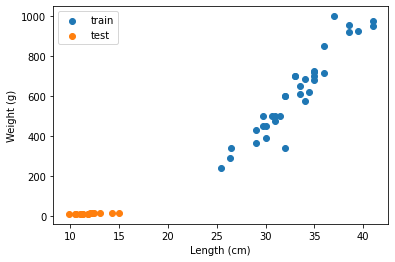

In [36]:
# X_train[:, 1]) length
plt.scatter(x=X_train[:, 1], y=X_train[:, 0], label='train') # 훈련셋
plt.scatter(x=X_test[:, 1], y=X_test[:, 1], label='test') # 테스트셋

plt.legend()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()

### KNN 분류기 훈련, 예측, 평가

In [ ]:
knn = KNeighborsClassifier() # 머신 러닝 모델 생성

In [ ]:
knn.fit(X_train, y_train) # 머신 러닝 모델 훈련

KNeighborsClassifier()

In [ ]:
# 훈련 셋에서의 예측 결과 평가
train_pred = knn.predict(X_train)
train_pred

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [ ]:
# 훈련 셋의 실젯값(훈련 레이블)
y_train

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [ ]:
# 훈련 셋 정확도
train_acc = np.mean(train_pred == y_train)
train_acc

1.0

In [34]:
# 테스트 셋에서의 예측 결과 평가
test_pred = knn.predict(X_test)
test_pred

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [37]:
# 테스트 셋의 실젯값(테스트 레이블)
y_test

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

In [39]:
# 테스트 셋 정확도
test_acc = np.mean(test_pred == y_test)
test_acc

0.0